In [1]:
# Import packages
 
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from scipy.spatial import distance
from scipy.stats import gmean, mode
from tqdm import tqdm
import glob

In [2]:
def calc_distance(cluster1, cluster2, centroid_df,type='kmeans'):
    """ Calculate the euclidean distance between two clusters. """

    if type=='ameans':
        center1 = centroid_df.loc[centroid_df.cluster_id==cluster1, ["centroid_x",  "centroid_y"]].values[0]
        center2 = centroid_df.loc[centroid_df.cluster_id==cluster2, ["centroid_x",  "centroid_y"]].values[0]

    elif type=='kmeans':
        center1 = centroid_df.loc[centroid_df.cluster_id==cluster1, ["kcentroid_x",  "kcentroid_y"]].values[0]
        center2 = centroid_df.loc[centroid_df.cluster_id==cluster2, ["kcentroid_x",  "kcentroid_y"]].values[0]
    else:
        print("Type has to be kmeans/ameans.")


    euc_dist = distance.euclidean(center1, center2)
    
    return euc_dist

In [3]:
def compute_pairwise_distances(centroid_df, n_clusters, n_iter, rseed):
    # Find distance between all pairs of clusters
    for cluster1 in tqdm(np.arange(n_clusters)):
        for cluster2 in np.arange(n_clusters):
            if cluster1 < cluster2:
                # Calculate the euclidean distance between a given pair of clusters
                dist = calc_distance(cluster1, cluster2, centroid_df, type='ameans')
                kdist = calc_distance(cluster1, cluster2, centroid_df, type='kmeans')
                
                # Store the pairwise distance in the distance matrix
                pairwise_distance_matrix[cluster1, cluster2, n_iter] = kdist
                # distance_matrix[cluster2, cluster1, n_iter] = 0
                pairwise_distance_dict['cluster1'].append(cluster1)
                pairwise_distance_dict['cluster2'].append(cluster2)
                pairwise_distance_dict['iteration'].append(n_iter)
                pairwise_distance_dict['distance'].append(dist)
                pairwise_distance_dict['kdistance'].append(kdist)
                pairwise_distance_dict['rseed'].append(rseed)
                pairwise_distance_dict['range_0_min'] = centroid_df['range_0_min'].values[0]
                pairwise_distance_dict['range_1_min'] = centroid_df['range_1_max'].values[0]
                pairwise_distance_dict['range_0_max'] = centroid_df['range_0_min'].values[0]
                pairwise_distance_dict['range_1_max'] = centroid_df['range_1_max'].values[0]


    return






In [4]:
data_folder = "/home/remya/Work/AlamTest/Alam JC/Oct 2024/Alam tests/Main script/Data/"
results_folder ="/home/remya/Work/AlamTest/Alam JC/Oct 2024/Alam tests/Aux scripts/RseedTest/Results/"
embeddings_folder = results_folder + '/Embeddings/'
centroids_folder = results_folder + '/KCentroids/'
distances_folder = results_folder + '/KDistances/'


In [5]:
normalise = False
# n_embeddings = 20

In [6]:
centroid_files = glob.glob(centroids_folder + 'centroids*.csv')


In [7]:
# embedding_files = glob.glob(embeddings_folder + 'UMAP_*_centroid.csv')
# rseeds = [int(efile.split('_')[-2]) for efile in embedding_files]

In [8]:


# Set the number of iterations and number of clusters expected (= # of syllables perhapss) 
n_iterations = 20 #n_embeddings  #len(rseeds)
n_clusters  = 150 #  tutored sylls = 150, total sylls = 228

# Initialising a matrix to hold all the pairwise distances in each representation
pairwise_distance_matrix = np.zeros((n_clusters, n_clusters, n_iterations))
pairwise_distance_dict = {
    'cluster1': [],
    'cluster2': [],
    'iteration': [],
    'distance': [],
    'kdistance': [],
    'rseed': [],
    'range_0_min': [],
    'range_1_min': [],
    'range_0_max': [],
    'range_1_max': []
}

In [9]:
for n_iter, centroid_file in tqdm(enumerate(centroid_files)):
    rseed = int(centroid_file.split('_')[-1].split('.')[0]) 

    # if normalise==False:
    #     centroid_file = embeddings_folder + 'UMAP_' + str(rseed) + '_centroid.csv'

    print(centroid_file)
    centroid_df = pd.read_csv(centroid_file)  

    compute_pairwise_distances(centroid_df, n_clusters, n_iter, rseed)



0it [00:00, ?it/s]

/home/remya/Work/AlamTest/Alam JC/Oct 2024/Alam tests/Aux scripts/RseedTest/Results//KCentroids/centroids__56755036.csv


100%|██████████| 150/150 [00:13<00:00, 11.04it/s]
1it [00:13, 13.59s/it]

/home/remya/Work/AlamTest/Alam JC/Oct 2024/Alam tests/Aux scripts/RseedTest/Results//KCentroids/centroids__21081788.csv


100%|██████████| 150/150 [00:13<00:00, 11.01it/s]
2it [00:27, 13.61s/it]

/home/remya/Work/AlamTest/Alam JC/Oct 2024/Alam tests/Aux scripts/RseedTest/Results//KCentroids/centroids__26735830.csv


100%|██████████| 150/150 [00:13<00:00, 11.02it/s]
3it [00:40, 13.62s/it]

/home/remya/Work/AlamTest/Alam JC/Oct 2024/Alam tests/Aux scripts/RseedTest/Results//KCentroids/centroids__31632483.csv


100%|██████████| 150/150 [00:13<00:00, 11.02it/s]
4it [00:54, 13.62s/it]

/home/remya/Work/AlamTest/Alam JC/Oct 2024/Alam tests/Aux scripts/RseedTest/Results//KCentroids/centroids__96319575.csv


100%|██████████| 150/150 [00:13<00:00, 11.01it/s]
5it [01:08, 13.62s/it]

/home/remya/Work/AlamTest/Alam JC/Oct 2024/Alam tests/Aux scripts/RseedTest/Results//KCentroids/centroids__91090292.csv


100%|██████████| 150/150 [00:13<00:00, 11.02it/s]
6it [01:21, 13.62s/it]

/home/remya/Work/AlamTest/Alam JC/Oct 2024/Alam tests/Aux scripts/RseedTest/Results//KCentroids/centroids__13953367.csv


100%|██████████| 150/150 [00:13<00:00, 11.02it/s]
7it [01:35, 13.62s/it]

/home/remya/Work/AlamTest/Alam JC/Oct 2024/Alam tests/Aux scripts/RseedTest/Results//KCentroids/centroids__4521373.csv


100%|██████████| 150/150 [00:13<00:00, 11.06it/s]
8it [01:48, 13.60s/it]

/home/remya/Work/AlamTest/Alam JC/Oct 2024/Alam tests/Aux scripts/RseedTest/Results//KCentroids/centroids__4981505.csv


100%|██████████| 150/150 [00:13<00:00, 11.06it/s]
9it [02:02, 13.59s/it]

/home/remya/Work/AlamTest/Alam JC/Oct 2024/Alam tests/Aux scripts/RseedTest/Results//KCentroids/centroids__85652971.csv


100%|██████████| 150/150 [00:13<00:00, 11.09it/s]
10it [02:15, 13.57s/it]

/home/remya/Work/AlamTest/Alam JC/Oct 2024/Alam tests/Aux scripts/RseedTest/Results//KCentroids/centroids__56882282.csv


100%|██████████| 150/150 [00:13<00:00, 11.05it/s]
11it [02:29, 13.57s/it]

/home/remya/Work/AlamTest/Alam JC/Oct 2024/Alam tests/Aux scripts/RseedTest/Results//KCentroids/centroids__3344769.csv


100%|██████████| 150/150 [00:13<00:00, 11.01it/s]
12it [02:43, 13.59s/it]

/home/remya/Work/AlamTest/Alam JC/Oct 2024/Alam tests/Aux scripts/RseedTest/Results//KCentroids/centroids__13315092.csv


100%|██████████| 150/150 [00:13<00:00, 11.09it/s]
13it [02:56, 13.57s/it]

/home/remya/Work/AlamTest/Alam JC/Oct 2024/Alam tests/Aux scripts/RseedTest/Results//KCentroids/centroids__93410762.csv


100%|██████████| 150/150 [00:13<00:00, 11.11it/s]
14it [03:10, 13.55s/it]

/home/remya/Work/AlamTest/Alam JC/Oct 2024/Alam tests/Aux scripts/RseedTest/Results//KCentroids/centroids__88358551.csv


100%|██████████| 150/150 [00:13<00:00, 11.12it/s]
15it [03:23, 13.53s/it]

/home/remya/Work/AlamTest/Alam JC/Oct 2024/Alam tests/Aux scripts/RseedTest/Results//KCentroids/centroids__65682867.csv


100%|██████████| 150/150 [00:13<00:00, 11.08it/s]
16it [03:37, 13.54s/it]

/home/remya/Work/AlamTest/Alam JC/Oct 2024/Alam tests/Aux scripts/RseedTest/Results//KCentroids/centroids__98750923.csv


100%|██████████| 150/150 [00:13<00:00, 11.11it/s]
17it [03:50, 13.53s/it]

/home/remya/Work/AlamTest/Alam JC/Oct 2024/Alam tests/Aux scripts/RseedTest/Results//KCentroids/centroids__35788921.csv


100%|██████████| 150/150 [00:13<00:00, 11.09it/s]
18it [04:04, 13.53s/it]

/home/remya/Work/AlamTest/Alam JC/Oct 2024/Alam tests/Aux scripts/RseedTest/Results//KCentroids/centroids__76737383.csv


100%|██████████| 150/150 [00:13<00:00, 11.08it/s]
19it [04:17, 13.53s/it]

/home/remya/Work/AlamTest/Alam JC/Oct 2024/Alam tests/Aux scripts/RseedTest/Results//KCentroids/centroids__88409749.csv


100%|██████████| 150/150 [00:13<00:00, 11.04it/s]
20it [04:31, 13.57s/it]


In [10]:

# Save the distance matrix in an npy file
np.save(distances_folder +  'pairwise_distance_matrix' + '.npy', pairwise_distance_matrix)

# Store the distance matrix in a csv file
pairwise_distance_df = pd.DataFrame.from_dict(pairwise_distance_dict)
pairwise_distance_df.to_csv(distances_folder + 'pairwise_distance_df' + '.csv', index=True)  

In [11]:
pairwise_distance_df

cluster1  cluster2  iteration   distance  kdistance     rseed  \
0              0         1          0  10.527877  10.741827  56755036   
1              0         2          0  17.378221  17.810941  56755036   
2              0         3          0   9.639285  10.310228  56755036   
3              0         4          0  14.173786  15.607478  56755036   
4              0         5          0   8.748823   8.953204  56755036   
...          ...       ...        ...        ...        ...       ...   
223495       146       148         19   7.914743   7.988527  88409749   
223496       146       149         19  20.019788  20.290228  88409749   
223497       147       148         19   6.217498   6.261926  88409749   
223498       147       149         19  15.049161  15.095982  88409749   
223499       148       149         19  20.590578  20.680555  88409749   

        range_0_min  range_1_min  range_0_max  range_1_max  
0        -16.302376    17.834356   -16.302376    17.834356  
1        -16.302376    17.834356   -16.302376    17.834356  
2        -16.302376    17.834356   -16.302376    17.834356  
3        -16.302376    17.834356   -16.302376    17.834356  
4        -16.302376    17.834356   -16.302376    17.834356  
...             ...          ...          ...          ...  
223495   -16.302376    17.834356   -16.302376    17.834356  
223496   -16.302376    17.834356   -16.302376    17.834356  
223497   -16.302376    17.834356   -16.302376    17.834356  
223498   -16.302376    17.834356   -16.302376    17.834356  
223499   -16.302376    17.834356   -16.302376    17.834356  

[223500 rows x 10 columns]

### Analyses

#### Plotting the pairwise distance b/w a given pair across the several iteratiions

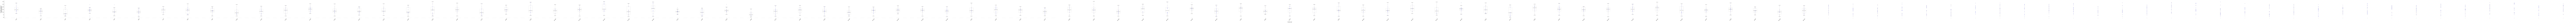

In [12]:
# Plot distances from all iterations for each pair of digit clusters
fig, ax = plt.subplots(1, figsize=(600, 4))
x_ticklabels = []

# Iterating through all pairs of digits
k = 0
for i in np.arange(0, n_clusters, 10):
    for j in np.arange(0, n_clusters, 10):
        if i<j:
            # Make a box plot
            ax.boxplot(pairwise_distance_matrix[i, j],
                   patch_artist=False,  # fill with color
                   positions = [k],
                   boxprops=dict(color='lightgrey'),
                   whiskerprops=dict(color='lightgrey'),
                   showfliers = False,
                   medianprops = dict(color='black')
                   ) 
            # Indicate each data point
            ax.scatter(np.zeros((n_iterations))+k, pairwise_distance_matrix[i, j], s=10, color='blue', marker='.')

            # Add the x-tick labels
            tl = str(i) + '-' + str(j)
            x_ticklabels.append(tl)

            # Increment the position on the x axis
            k += 1

# Plot formatting
ax.set_xticklabels(x_ticklabels, rotation=45);
ax.set_ylabel('Euclidean distance\nb/w cluster pair')
ax.set_xlabel('Cluster pair')

ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
# ax.spines['bottom'].set_visible(False)
# ax.spines['left'].set_visible(False)



Fig: The x axis indicates the pair of clusters being tested. The blue point shows the euclidean distance b/w the clusters of the test pair, in one UMAP representation. The box plot describes the distribution of pairwise distances for a given test pair.

In [13]:
# Saving the figure
fig.savefig(distances_folder + 'pairwise_cluster_distances_partial.png', bbox_inches='tight')# Saving the figure
fig.savefig(distances_folder + 'pairwise_cluster_distances_partial.svg', bbox_inches='tight')

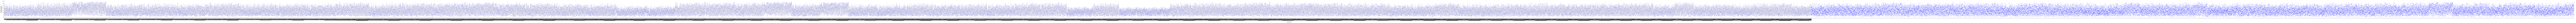

In [14]:
# Plot distances from all iterations for each pair of digit clusters
fig, ax = plt.subplots(1, figsize=(600, 4))
x_ticklabels = []

# Iterating through all pairs of digits
k = 0
for i in np.arange(0, n_clusters, 1):
    for j in np.arange(0, n_clusters, 1):
        if i<j:
            # Make a box plot
            ax.boxplot(pairwise_distance_matrix[i, j],
                   patch_artist=False,  # fill with color
                   positions = [k],
                   boxprops=dict(color='lightgrey'),
                   whiskerprops=dict(color='lightgrey'),
                   showfliers = False,
                   medianprops = dict(color='black')
                   ) 
            # Indicate each data point
            ax.scatter(np.zeros((n_iterations))+k, pairwise_distance_matrix[i, j], s=10, color='blue', marker='.')

            # Add the x-tick labels
            tl = str(i) + '-' + str(j)
            x_ticklabels.append(tl)

            # Increment the position on the x axis
            k += 1

# Plot formatting
ax.set_xticklabels(x_ticklabels, rotation=45);
ax.set_ylabel('Euclidean distance\nb/w cluster pair')
ax.set_xlabel('Cluster pair')

ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
# ax.spines['bottom'].set_visible(False)
# ax.spines['left'].set_visible(False)



In [15]:
# Saving the figure
fig.savefig(distances_folder + 'pairwise_cluster_distances.png', bbox_inches='tight')# Saving the figure
fig.savefig(distances_folder + 'pairwise_cluster_distances.svg', bbox_inches='tight')